

Customer Churn Prediction based on Banking Account Data
Detail on Data: https://www.kaggle.com/shrutimechlearn/churn-modelling

TODO: Download source data from Github
!wget https://raw.githubusercontent.com/DLPY/Regression-Session-2/master/Data/SydneyHousePrices.csv

Table of Contents:
Section 1 - Import the Libs and load the dataframe
Section 2 - EDA
Section 3 - Appendix

# # Import necessary packages for performing EDA

In [1]:
import seaborn as sns #Visualization Lib
import matplotlib.pyplot as plt #Visualization Lib
import pandas as pd #Data manipulation lib
import numpy as np #mathamatical functions

In [2]:
# Read data from csv file into Pandas dataframe
!wget https://raw.githubusercontent.com/DLPY/Classification_Session_1/main/Churn_Modelling.csv
data = pd.read_csv('Churn_Modelling.csv')

--2022-02-09 12:04:27--  https://raw.githubusercontent.com/DLPY/Classification_Session_1/main/Churn_Modelling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘Churn_Modelling.csv’

Churn_Modelling.csv 100%[===================>] 668.81K  --.-KB/s    in 0.05s   

2022-02-09 12:04:28 (12.6 MB/s) - ‘Churn_Modelling.csv’ saved [684858/684858]



# Exploratory Data Analysis (EDA)
Perform data analysis, cleaning and transformation.

In [3]:
# Display the count of rows and columns.
data.shape
#(10000 rows, 14 columns)

(10000, 14)

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed their account) or they continue to be a customer.

Here we have 13 feature columns and Exited is a target column.

Row Numbers: Row Numbers from 1 to 10000.

CustomerId: Unique Ids for bank customer identification.

Surname: Customer's last name.

CreditScore: Credit score of the customer.

Geography: The country from which the customer belongs(Germany/France/Spain).

Gender: Male or Female.

Age: Age of the customer.

Tenure: Number of years for which the customer has been with the bank. Balance: Bank balance of the customer.

NumOfProducts: Number of bank products the customer is utilising.

HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not(0=No, 1=Yes).

IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not(0=No, 1=Yes).

EstimatedSalary: Estimated salary of the customer in Euro.

Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained(0=No, 1=Yes).

In [4]:
# Review a small sample of the data.
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Checking for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Detailed overview of the dataframe itself.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the above:
    Notice that there are no Non-Null Count values, e.g. there are no missing values in this data set.
    Also notice the different types of data: integer (int64), float (float64), and text (object).
    Geography and Gender need to be converted from a text value to a numeric value for modelling.

In [7]:
# remove duplicates, if any
data = data[~data.duplicated()] 
data.shape
#No duplicate values

(10000, 14)

## Transformation

Encoding the categorical variables - Change the text into numbers
Review the unique values in the Geography column.

In [8]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

Convert the categorical values into numeric categorical labels so that this data can be reviewed in the EDA, e.g. correlations.

In [10]:
#Decision tree needs data to be numeric
data['CountryCode'] = data['Geography'].astype('category').cat.codes
data['GenderCode'] = data['Gender'].astype('category').cat.codes

Geography - (0:France, 1:Germany, 2:Spain)
Gender - (0:Female, 1:Male)

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CountryCode,GenderCode
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


From the above, notice that:
    The Geography and Gender have been converted to numeric values.
    There are two new columns with these values: CountryCode and GenderCode.

Quick review - columns that are not useful:
CustomerId - a unique customer ID number.
RowNumber - This is simply a row number of the data.
Surname - does not add any strength as a model input.
Geography - this has been converted to a numeric value instead of text.
Gender - this has been converted to a numeric value instead of text.

## Choosing predictor variables and target variable for performing Classification
Target and Source variables

Target Variable: Exited
Predictor Variables: CreditScore, CountryCode, GenderCode, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary

## Create a new dataframe that includes only the selected columns

In [12]:
df = data[['CreditScore', 'CountryCode', 'GenderCode', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
             'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [13]:
df.head()

,CreditScore,CountryCode,GenderCode,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Investigate correlation in the new dataframe.
Pandas has a built-in correlation function. The df_new dataframe will be used to examine correlation.

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CreditScore,CountryCode,GenderCode,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
CountryCode,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
GenderCode,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


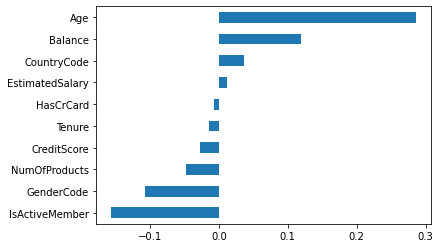

In [15]:
# Variables correlated to Exited.
df.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh');

From the above, notice that:
    There are 10 variables that have varying degrees of correlation with 'Exited'.
    These should be examined closer, to try and get a better understanding of the correlation.

# Visualization

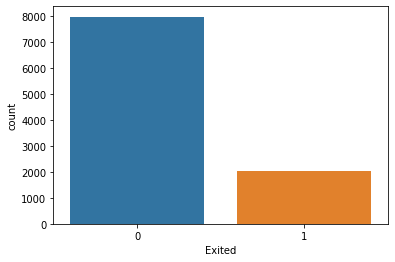

In [16]:
#Summary of Exited and Non-Exited
sns.countplot(x='Exited', data = df)

From the above, notice that:
There are many more customers that have not 'Exited'. This is referred to as 'class imbalance'.

## High impact variables (Age, IsActiveMember)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


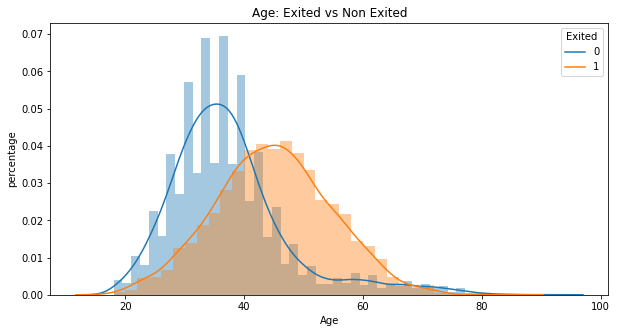

In [17]:
# Split the group into two cohorts for further analysis
Non_Exited = df[df['Exited'] == 0]
Exited = df[df['Exited'] == 1]
plt.subplots(figsize=(10, 5))
sns.distplot(Non_Exited['Age'])
sns.distplot(Exited['Age'])
plt.title('Age: Exited vs Non Exited')
plt.legend([0, 1], title='Exited')
plt.ylabel('percentage');

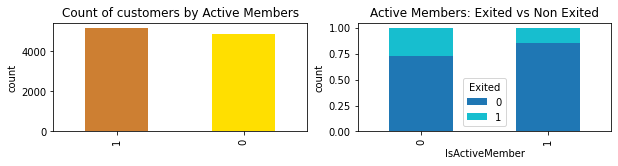

In [18]:

cross_tab_prop = pd.crosstab(index=data['IsActiveMember'],
                             columns=data['Exited'],
                             normalize="index")
# Examine customers by country.
f, ax=plt.subplots(1, 2, figsize=(10, 2))
data['IsActiveMember'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Count of customers by Active Members')
ax[0].set_ylabel('count')
cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 2), ax=ax[1])
ax[1].set_title('Active Members: Exited vs Non Exited')
ax[1].set_ylabel('count');

# Appendix

## Low Impact variables (HasCreditCard, Estimated Salary)

In [ ]:
cross_tab_prop = pd.crosstab(index=data['HasCrCard'],
                             columns=data['Exited'],
                             normalize="index")
# Examine customers by country.
f, ax=plt.subplots(1, 2, figsize=(10, 5))
data['HasCrCard'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Count of customers by HasCrCard')
ax[0].set_ylabel('count')
cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 5), ax=ax[1])
ax[1].set_title('HasCrCard: Exited vs Non Exited')
ax[1].set_ylabel('count');

In [ ]:
plt.subplots(figsize=(10, 5))
sns.distplot(Non_Exited['EstimatedSalary'])
sns.distplot(Exited['EstimatedSalary'])
plt.title('EstimatedSalary: Exited vs Non Exited')
plt.legend([0, 1], title='Exited')
plt.ylabel('percentage');plt.figure(figsize=(18,8))


In [ ]:
cross_tab_prop = pd.crosstab(index=data['Geography'],
                             columns=data['Exited'],
                             normalize="index")
# Examine customers by country.
f, ax=plt.subplots(1, 2, figsize=(10, 2))
data['Geography'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Count of customers by countries')
ax[0].set_ylabel('count')
cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 2), ax=ax[1])
ax[1].set_title('Countries: Exited vs Non Exited')
ax[1].set_ylabel('count');

From the above, notice that:
    France has the largest number of customers
    Germany and Spain have a similar count of customers.
    Germany has the highest proportion of customers that 'Exited'.

In [ ]:
# Compare exited by age and geography.
sns.swarmplot(y='Age', x='Geography', hue='Exited', data=data);

Observations
    Germany has the highest proportion of churn (Lowest percentage of Non-exited customers and Highest percentage of exited         customers)
    Customers across all countries tend to have a higher tendency to churn after 40 years of age.

In [ ]:
# Examine customers by gender.
f, ax=plt.subplots(1, 2, figsize=(10, 2))
data['Gender'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Count of customer by gender')
ax[0].set_ylabel('count')
cross_tab_prop = pd.crosstab(index=data['Gender'],
                             columns=data['Exited'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 2), ax=ax[1])
ax[1].set_title('Gender: Exited vs Non Exited')
ax[1].set_ylabel('count');

In [ ]:
sns.swarmplot(y='Age', x='Gender', hue='Exited', data=data);

In [ ]:
# Examine customers by Age.
f, ax=plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data['Age'], ax=ax[0])
ax[0].set_title('Count of customer by gender')
ax[0].set_ylabel('count')
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', ax=ax[1])
ax[1].set_title('Age: Exited vs Non Exited')
ax[1].set_ylabel('Balance');

In [ ]:
sns.boxplot(data['CreditScore'])

From above we can see that majority of the people have a credit score between 590 to 720
Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset

From above, notice that there are three countries represented within the data set.

In [ ]:
cross_tab_prop = pd.crosstab(index=data['Age'],
                             columns=data['Exited'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(19, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age")
plt.ylabel("Exited")
plt.show()

In [ ]:
sns.countplot(x='Tenure', data = data)

In [ ]:
cross_tab_prop = pd.crosstab(index=data['Tenure'],
                             columns=data['Exited'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Tenure")
plt.ylabel("Exited")
plt.show()

In [ ]:
sns.boxplot(data['Balance'])

In [ ]:
Non_Exited = data[data['Exited']==0]
Exited = data[data['Exited']==1]
plt.figure(figsize=(18,8))
p1=sns.kdeplot(Non_Exited['Balance'], shade=True, color="r")
p1=sns.kdeplot(Exited['Balance'], shade=True, color="b");
plt.title('Account Balance: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

In [ ]:
sns.countplot(x = 'NumOfProducts', data = data)

In [ ]:
pd.crosstab(data.NumOfProducts,data.Exited,margins=True).style.background_gradient(cmap='OrRd')

In [ ]:
cross_tab_prop = pd.crosstab(index=data['NumOfProducts'],
                             columns=data['Exited'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(19, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("NumOfProducts")
plt.ylabel("Exited")
plt.show()

In [ ]:
sns.countplot(x = 'HasCrCard', data = data)
cross_tab_prop = pd.crosstab(index=data['HasCrCard'],
                             columns=data['Exited'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 4))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("HasCrCard")
plt.ylabel("Exited")
plt.show()

In [ ]:
cross_tab_prop = pd.crosstab(index=data['HasCrCard'],
                             columns=data['Exited'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(19, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("HasCrCard")
plt.ylabel("Exited")
plt.show()

In [ ]:
plt.figure(figsize=(18,8))
plt.hist(x='EstimatedSalary',bins=100,data=Non_Exited,edgecolor='black',color='red')
plt.hist(x='EstimatedSalary',bins=100,data=Exited,edgecolor='black',color='blue')
plt.title('Estimated salary: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');